In [1]:
import sys, os, glob
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import warnings

# logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.DEBUG)
logging.basicConfig(stream=sys.stdout, format='%(asctime)s - %(levelname)s - %(message)s', level=logging.INFO)

%matplotlib inline
font = {'family' : 'Arial',
        'size'   : 7}
matplotlib.rc('font', **font)
plt.rcParams['svg.fonttype'] = 'none'
# plt.rcParams['pdf.fonttype'] = 42

# make a folder to store figures if not already there
!mkdir ../jupyter_figures


mkdir: ../jupyter_figures: File exists


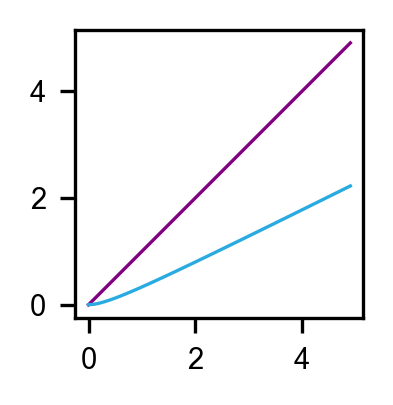

In [2]:
# Plot the relationship between alpha and beta
#
# alpha = [dN(in)/dt] / [dN(surf)/dt]
# beta = r / h, r is interior radius, h is surface layer thickness
#
# Relationship of the two for sphere:
# alpha1 = beta**2 / (2*beta + 1)
# Relationship of the two for oblate:
# alpha1 = beta

fig_width, fig_height = 1.2, 1.2
fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

beta = np.arange(0, 5.0, 0.1)
alpha1 = [i*i / (2*i + 1) for i in beta]
alpha2 = beta
ax.plot(beta, alpha2, lw=.8, color='Purple')
# ax.plot(beta, alpha1, lw=.8, color='Cyan')
ax.plot(beta, alpha1, lw=.8, color=(0.16, 0.67, 0.886))

ax.set_xticks(np.arange(0, 5, 2))
ax.set_yticks(np.arange(0, 5, 2))

# The following removes excessive clipping to facilitate detailing of line widths and colors etc in illustrator
for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig('../jupyter_figures/alpha-beta-relationship.svg')


In [3]:
f = '../data/pHH3-SMG-Ki67-spheroids-IF-data/180209-20x-E13-pHH3-midZ-pHH3-7749.txt'
df = pd.read_csv(f, header = 0, sep='\t')
df.head()
df['alpha'] = ( df.pHH3_thres_area_in / df.area_in ) / ( df.pHH3_thres_area_surf / df.area_surf )
df['R_in'] = ( df.pHH3_thres_area_in / df.area_in )
df['R_surf'] = ( df.pHH3_thres_area_surf / df.area_surf )
df['radius_interior'] = (df.area_in / np.pi)**.5
# df['thickness_surf'] = ( (df.area_in + df.area_surf) / np.pi)**.5 - df.radius_interior
# df['beta'] = df.radius_interior / df.thickness_surf
df['beta'] = df.radius_interior / 15.0
df.head()


2020-04-16 11:25:54,851 - INFO - NumExpr defaulting to 8 threads.


,filename,ROI,area_in,area_surf,pHH3_mean_in,DAPI_mean_in,Ecad_mean_in,pHH3_thres_area_in,DAPI_thres_area_in,pHH3_mean_surf,DAPI_mean_surf,Ecad_mean_surf,pHH3_thres_area_surf,DAPI_thres_area_surf,alpha,R_in,R_surf,radius_interior,beta
0,180209_20x_E13_Ecad-pHH3-Col4-DAPI_2018_02_09_...,0,6188.9778,4659.7779,692.9018,5276.1653,1761.5660,780.7794,2582.0474,882.8754,5671.7921,1543.2500,815.9455,1549.6276,0.720466,0.126156,0.175104,44.384826,2.958988
1,180209_20x_E13_Ecad-pHH3-Col4-DAPI_2018_02_09_...,1,5849.1709,5473.8927,748.7453,4959.7606,1787.2578,540.1699,2893.1638,727.9366,5127.0349,1497.4980,562.9478,2217.3215,0.897975,0.092350,0.102842,43.149147,2.876610
2,180209_20x_E13_Ecad-pHH3-Col4-DAPI_2018_02_09_...,2,11072.4916,6405.9703,659.3362,3915.5225,1700.1247,1176.3182,5179.9932,966.2878,4090.1402,1329.8542,1027.3694,2864.8032,0.662427,0.106238,0.160377,59.367361,3.957824
3,180209_20x_E13_Ecad-pHH3-Col4-DAPI_2018_02_09_...,3,10232.3646,6380.5378,783.9266,4024.4162,1777.1135,1754.7360,6468.7166,1065.0497,3963.8354,1246.7786,1428.2022,3279.5494,0.766132,0.171489,0.223837,57.070683,3.804712
4,180209_20x_E13_Ecad-pHH3-Col4-DAPI_2018_02_09_...,0,10525.7462,7301.8749,512.9406,4579.1376,1310.8349,2160.9390,2965.8071,534.6127,5176.0017,958.4647,1301.3295,2697.5397,1.151958,0.205300,0.178219,57.883064,3.858871


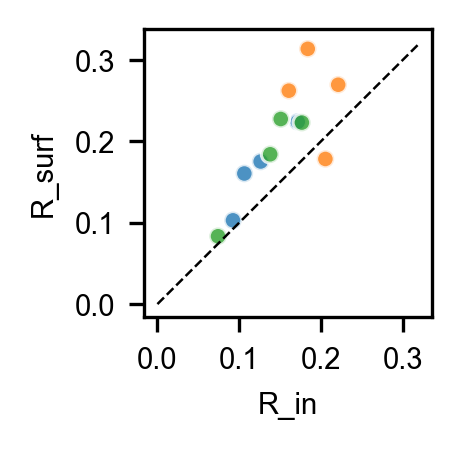

In [4]:
fig_width, fig_height = 1.2, 1.2
fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# ax.plot(df.R_in, df.R_surf, 'ob', mew=0, ms=3, alpha=.5)
sns.scatterplot(x='R_in', y='R_surf', hue='filename', data=df, alpha=.8, size=1, legend=False)
x = np.linspace(0, 0.32, 10)
ax.plot(x, x, color='k', ls='--', lw=.6)

ax.set_xticks(np.arange(0, .4, .1))
ax.set_yticks(np.arange(0, .4, .1))


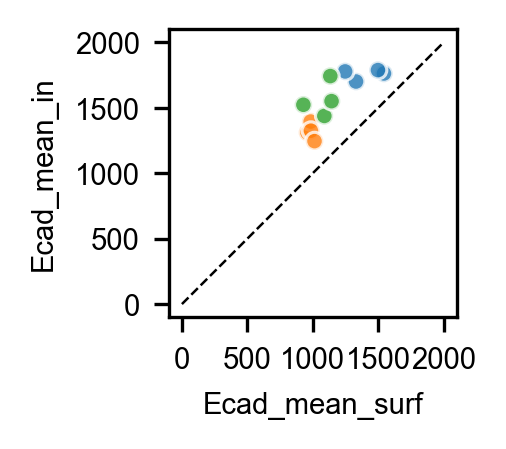

In [5]:
fig_width, fig_height = 1.2, 1.2
fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# ax.plot(df.R_in, df.R_surf, 'ob', mew=0, ms=3, alpha=.5)
sns.scatterplot(x='Ecad_mean_surf', y='Ecad_mean_in', hue='filename', data=df, alpha=.8, size=1, legend=False)
x = np.linspace(0, 2000, 10)
ax.plot(x, x, color='k', ls='--', lw=.6)

ax.set_xticks(np.arange(0, 2100, 500))
ax.set_yticks(np.arange(0, 2100, 500))


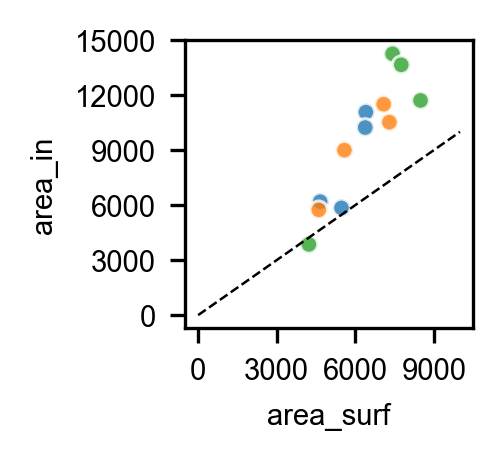

In [6]:
fig_width, fig_height = 1.2, 1.2
fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

# ax.plot(df.R_in, df.R_surf, 'ob', mew=0, ms=3, alpha=.5)
sns.scatterplot(x='area_surf', y='area_in', hue='filename', data=df, alpha=.8, size=1, legend=False)
x = np.linspace(0, 10000, 10)
ax.plot(x, x, color='k', ls='--', lw=.6)

ax.set_xticks(np.arange(0, 10000, 3000))
ax.set_yticks(np.arange(0, 16000, 3000))


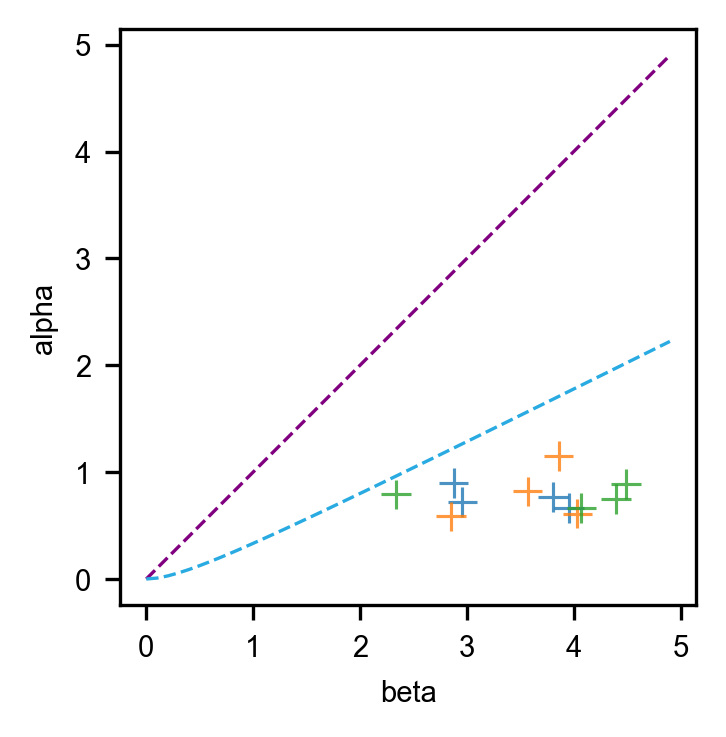

In [7]:
# Plot the relationship between alpha and beta
#
# alpha = [dN(in)/dt] / [dN(surf)/dt]
# beta = r / h, r is interior radius, h is surface layer thickness
#
# Relationship of the two for sphere:
# alpha1 = beta**2 / (2*beta + 1)
# Relationship of the two for oblate:
# alpha1 = beta

fig_width, fig_height = 2.4, 2.4
fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

beta = np.arange(0, 5.0, 0.1)
alpha1 = [i*i / (2*i + 1) for i in beta]
alpha2 = beta
ax.plot(beta, alpha2, lw=.8, color='Purple', linestyle='--')
ax.plot(beta, alpha1, lw=.8, color=(0.16, 0.67, 0.886), linestyle='--')
# ax.plot(df.beta, df.alpha, '+b', mew=.6, ms=5)
sns.scatterplot(x='beta', y='alpha', hue='filename', marker='+', s=50, data=df, alpha=.8, legend=False)
# sns.scatterplot(x='beta', y='alpha', hue='filename', data=df, legend=False, size=0.1)
# ax.axhline(1, color='k', linestyle='--', linewidth=.8)

ax.set_xticks(np.arange(0, 5.5, 1))
ax.set_yticks(np.arange(0, 5.5, 1))

# The following removes excessive clipping to facilitate detailing of line widths and colors etc in illustrator
for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig('../jupyter_figures/alpha-beta-relationship-plus-pHH3.svg')


In [8]:
f = '../data/pHH3-SMG-Ki67-spheroids-IF-data/20x-LMN-KI67-IF-for-alpha-beta-estimation-pHH3-655.txt'
df = pd.read_csv(f, header = 0, sep='\t')
df.head()

# Group2: D193 + D267, or sg-Control + sg1-Cdh1, ABA, MG
# Group4: D193 + D266, or sg-Control + sg2-Cdh1, ABA, MG
df['groups'] = ['Group2'] * 4 + ['Group4'] * 4

df['Rate_expansion_in'] = df.Ki67_thres_area_in / df.area_in
df['Rate_expansion_surf'] = df.Ki67_thres_area_surf / df.area_surf
df['alpha'] = df.Rate_expansion_in / df.Rate_expansion_surf
df['radius_in'] = (df.area_in / np.pi)**.5
df['radius_epi'] = ( (df.area_in + df.area_surf) / np.pi )**.5
df['beta'] = df.radius_in / (df.radius_epi - df.radius_in)


# Inspecting the segmentation masks has revealed that group 4 data has vastly under-estimated interior domain,
# thus, only plot the 4 data points of group 2
df = df[df.groups == 'Group2']
df.head()

,filename,area_in,area_surf,Ki67_thres_area_in,Ki67_thres_area_surf,groups,Rate_expansion_in,Rate_expansion_surf,alpha,radius_in,radius_epi,beta
0,191017-ABA-MG-405-LMN-647-Ki67-denoised-03_193...,180911.780,70463.0281,4133.5241,7042.6722,Group2,0.022848,0.099948,0.228601,239.970848,282.869381,5.593917
1,191017-ABA-MG-405-LMN-647-Ki67-denoised-04_193...,154787.382,94504.0552,2638.3950,2366.8693,Group2,0.017045,0.025045,0.680582,221.969264,281.694744,3.716492
2,191017-ABA-MG-405-LMN-647-Ki67-denoised-05_193...,181965.824,81884.8720,501.3375,1793.6914,Group2,0.002755,0.021905,0.125776,240.668903,289.803873,4.898118
3,191017-ABA-MG-405-LMN-647-Ki67-denoised-06_193...,186266.976,71801.7307,1273.0420,2276.4895,Group2,0.006835,0.031705,0.215564,243.496653,286.610922,5.647705


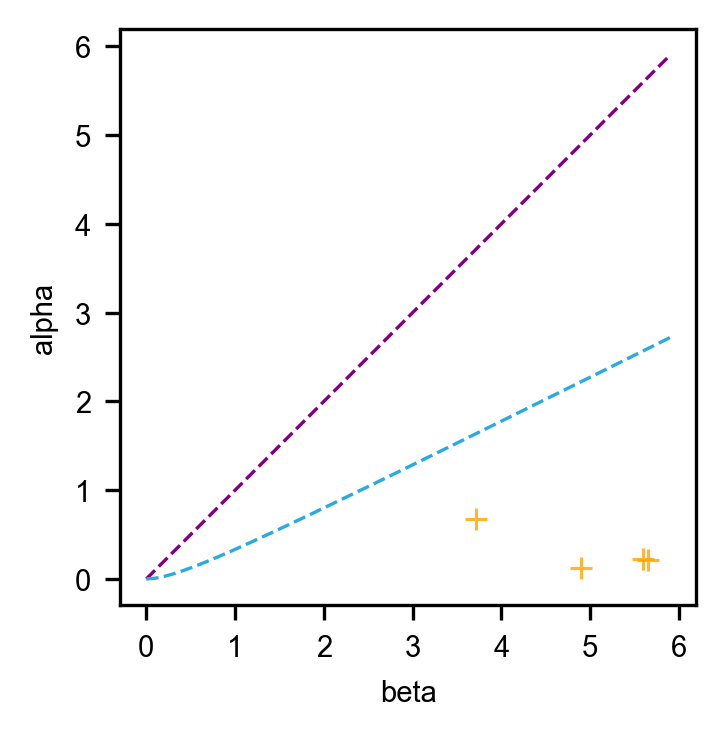

In [9]:
# Plot the relationship between alpha and beta
#
# alpha = [dN(in)/dt] / [dN(surf)/dt]
# beta = r / h, r is interior radius, h is surface layer thickness
#
# Relationship of the two for sphere:
# alpha1 = beta**2 / (2*beta + 1)
# Relationship of the two for oblate:
# alpha1 = beta

fig_width, fig_height = 2.4, 2.4
fig = plt.figure(figsize=(fig_width, fig_height), dpi=300)
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8])

beta = np.arange(0, 6.0, 0.1)
alpha1 = [i*i / (2*i + 1) for i in beta]
alpha2 = beta
ax.plot(beta, alpha2, lw=.8, color='Purple', linestyle='--')
ax.plot(beta, alpha1, lw=.8, color=(0.16, 0.67, 0.886), linestyle='--')
# ax.plot(df.beta, df.alpha, '+b', mew=.6, ms=5)
sns.scatterplot(x='beta', y='alpha', color='Orange', marker='+', s=30, data=df, alpha=.8, legend=False)
# sns.scatterplot(x='beta', y='alpha', hue='filename', data=df, legend=False, size=0.1)
# ax.axhline(1, color='k', linestyle='--', linewidth=.8)

ax.set_xticks(np.arange(0, 6.5, 1))
ax.set_yticks(np.arange(0, 6.5, 1))

# The following removes excessive clipping to facilitate detailing of line widths and colors etc in illustrator
for o in fig.findobj():
    o.set_clip_on(False)
for o in ax.findobj():
    o.set_clip_on(False)

plt.savefig('../jupyter_figures/alpha-beta-relationship-plus-Ki67.svg')
